In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\dell\\Desktop\\Machine Learning\\winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
df['quality'].nunique()

6

In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [23]:
df['alcohol'].value_counts().head()

9.5     139
9.4     103
9.8      78
9.2      72
10.5     67
Name: alcohol, dtype: int64

In [6]:
#df['fixed acidity'].value_counts()

Text(0.5,1,'BarPlot of RedWine Quality Check')

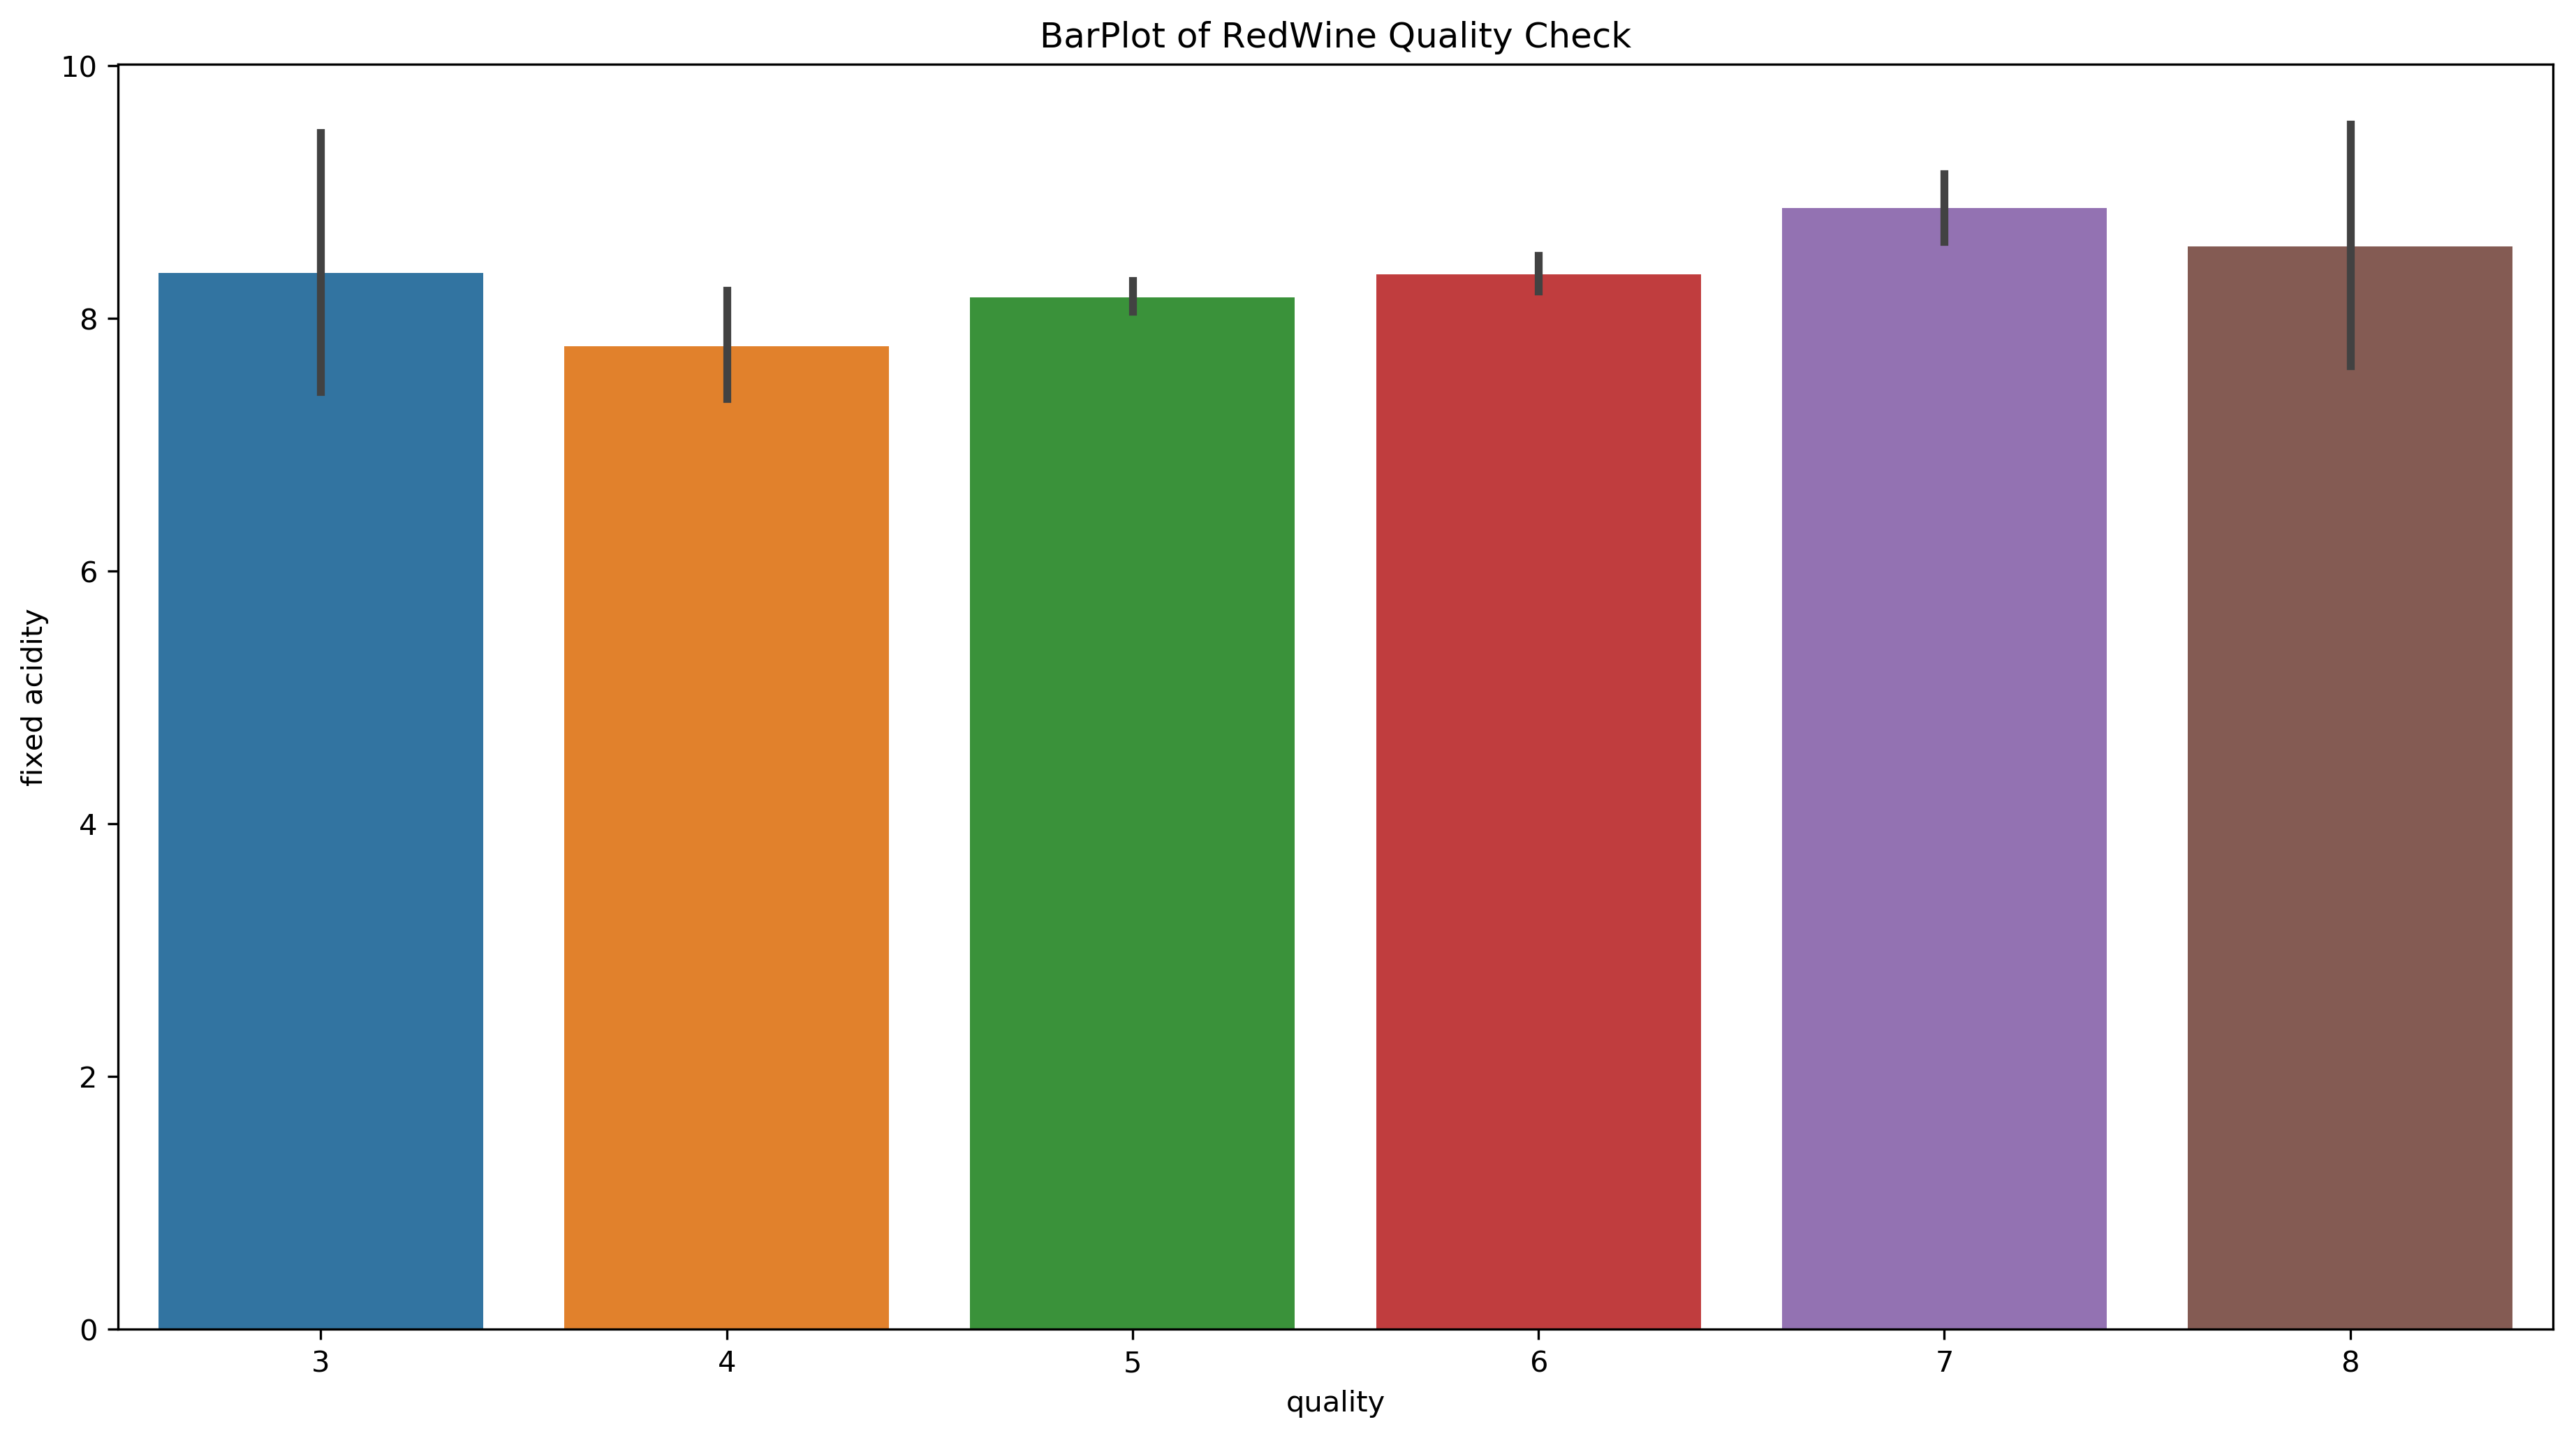

In [12]:
plt.figure(figsize=(15,8),dpi=300)
sns.barplot(x=df['quality'],y=df['fixed acidity'],data=df)
plt.title("BarPlot of RedWine Quality Check")

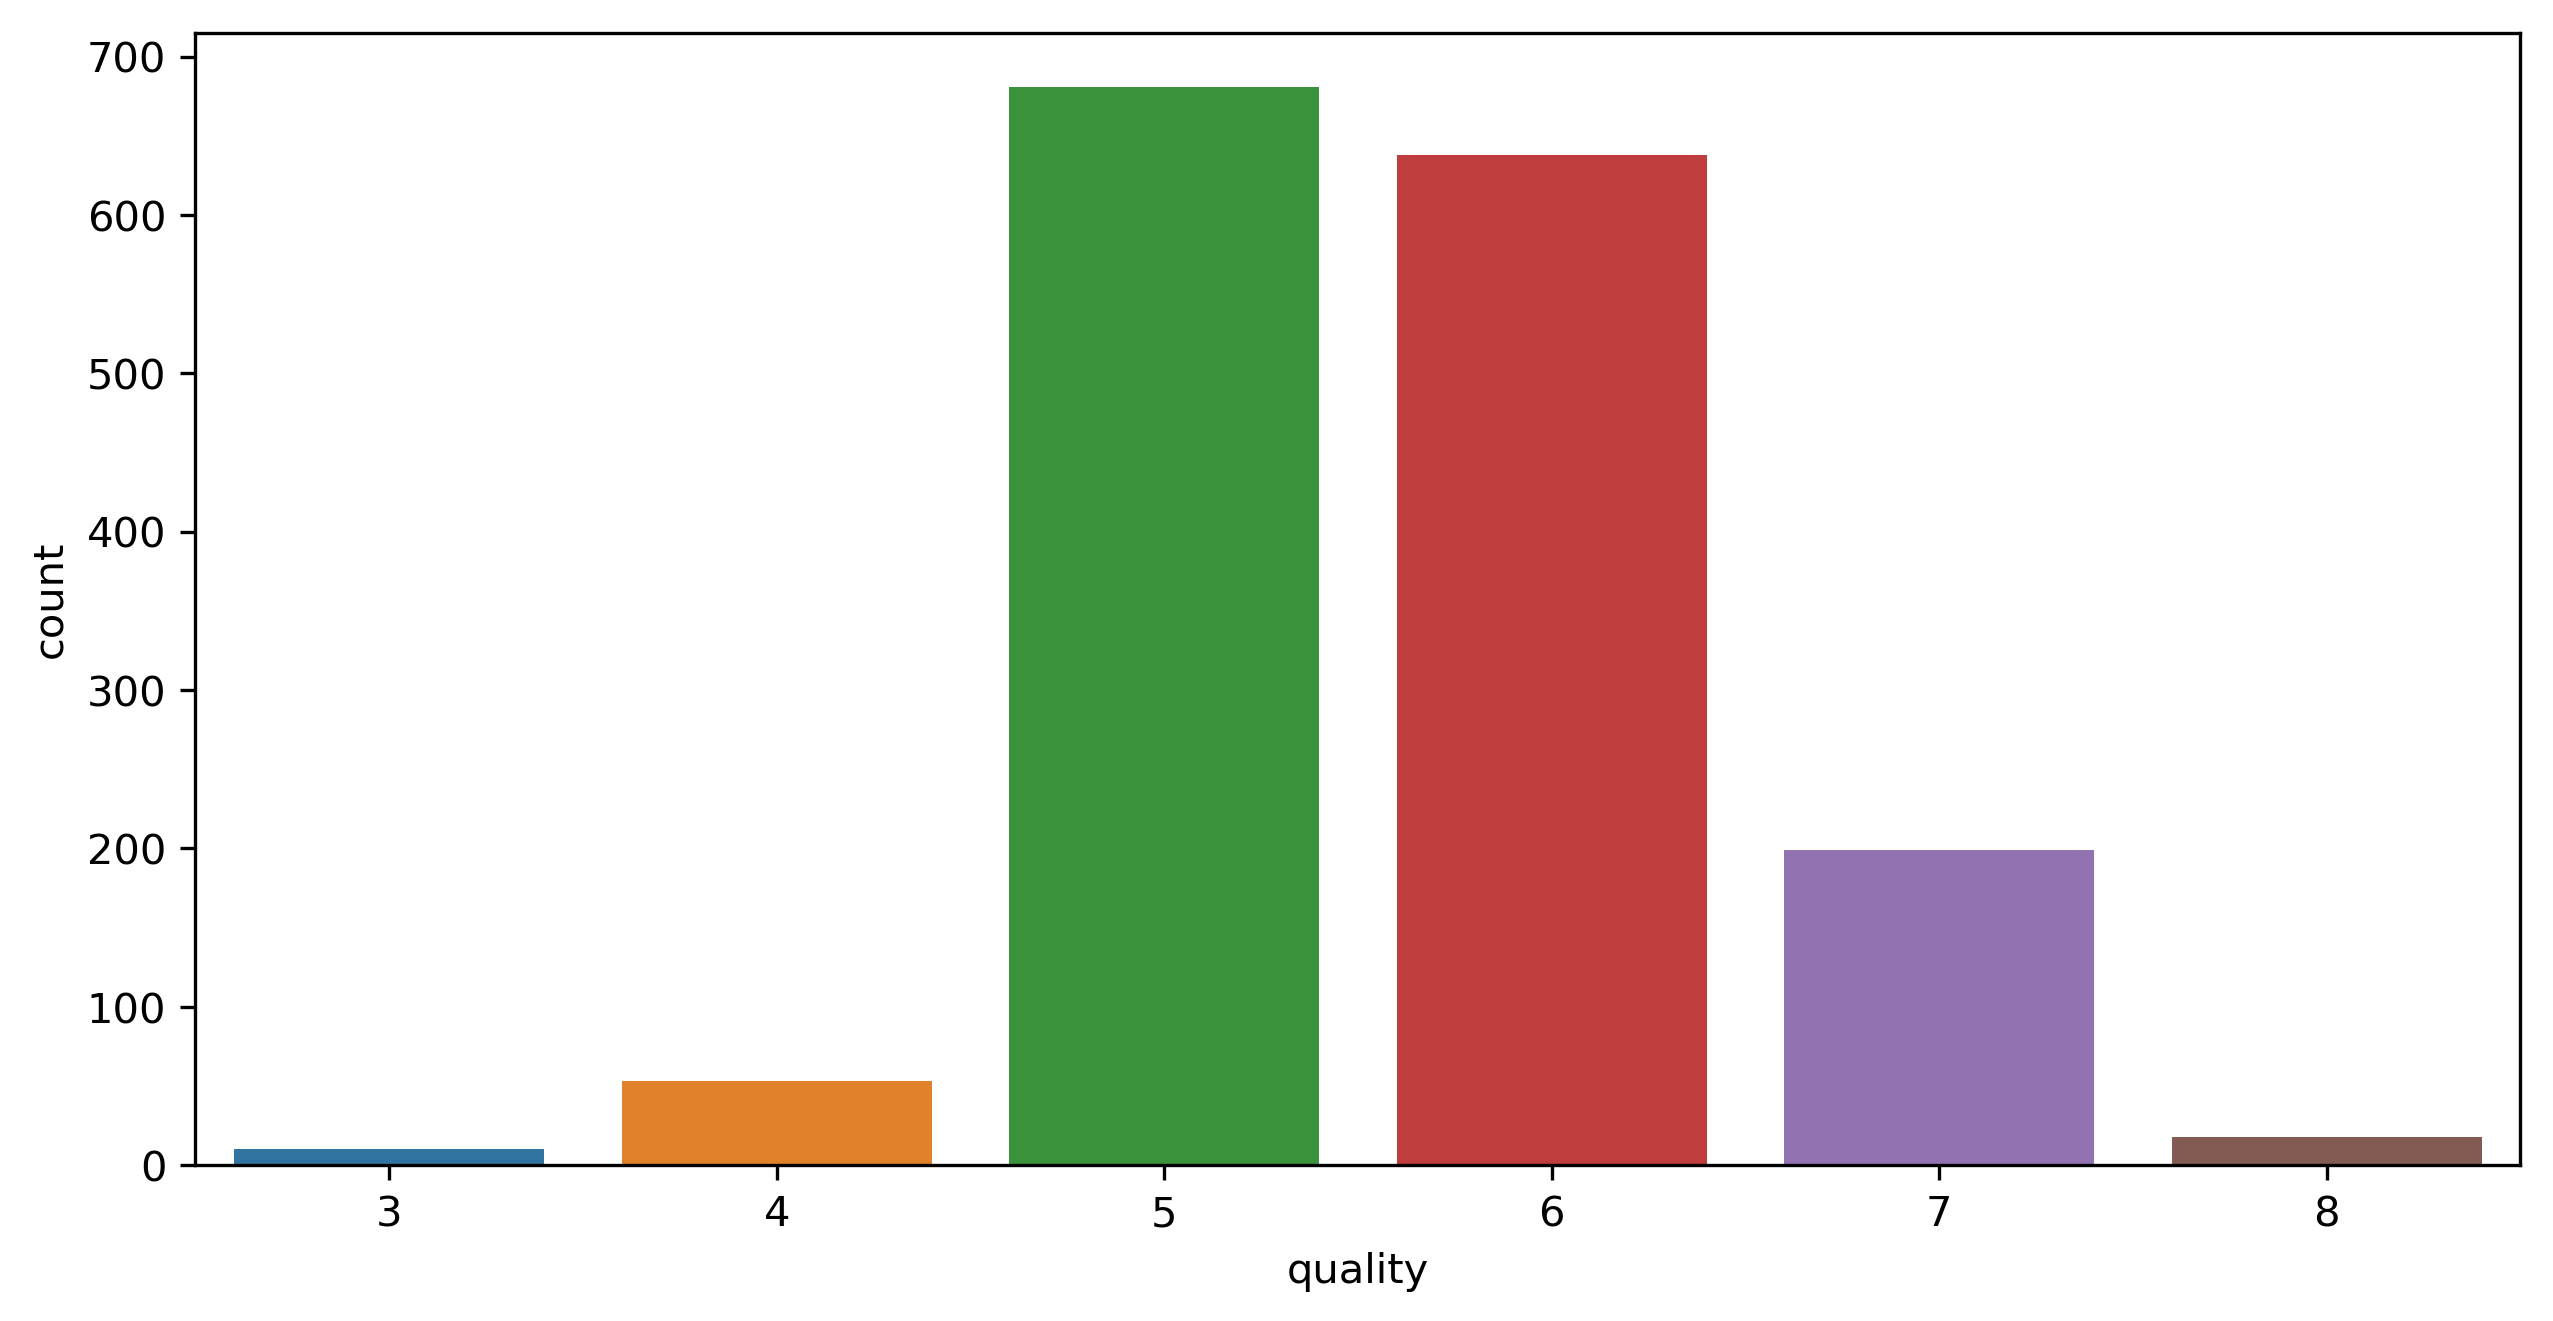

In [14]:
plt.figure(figsize=(10,5),dpi=300)
sns.countplot(df['quality'])

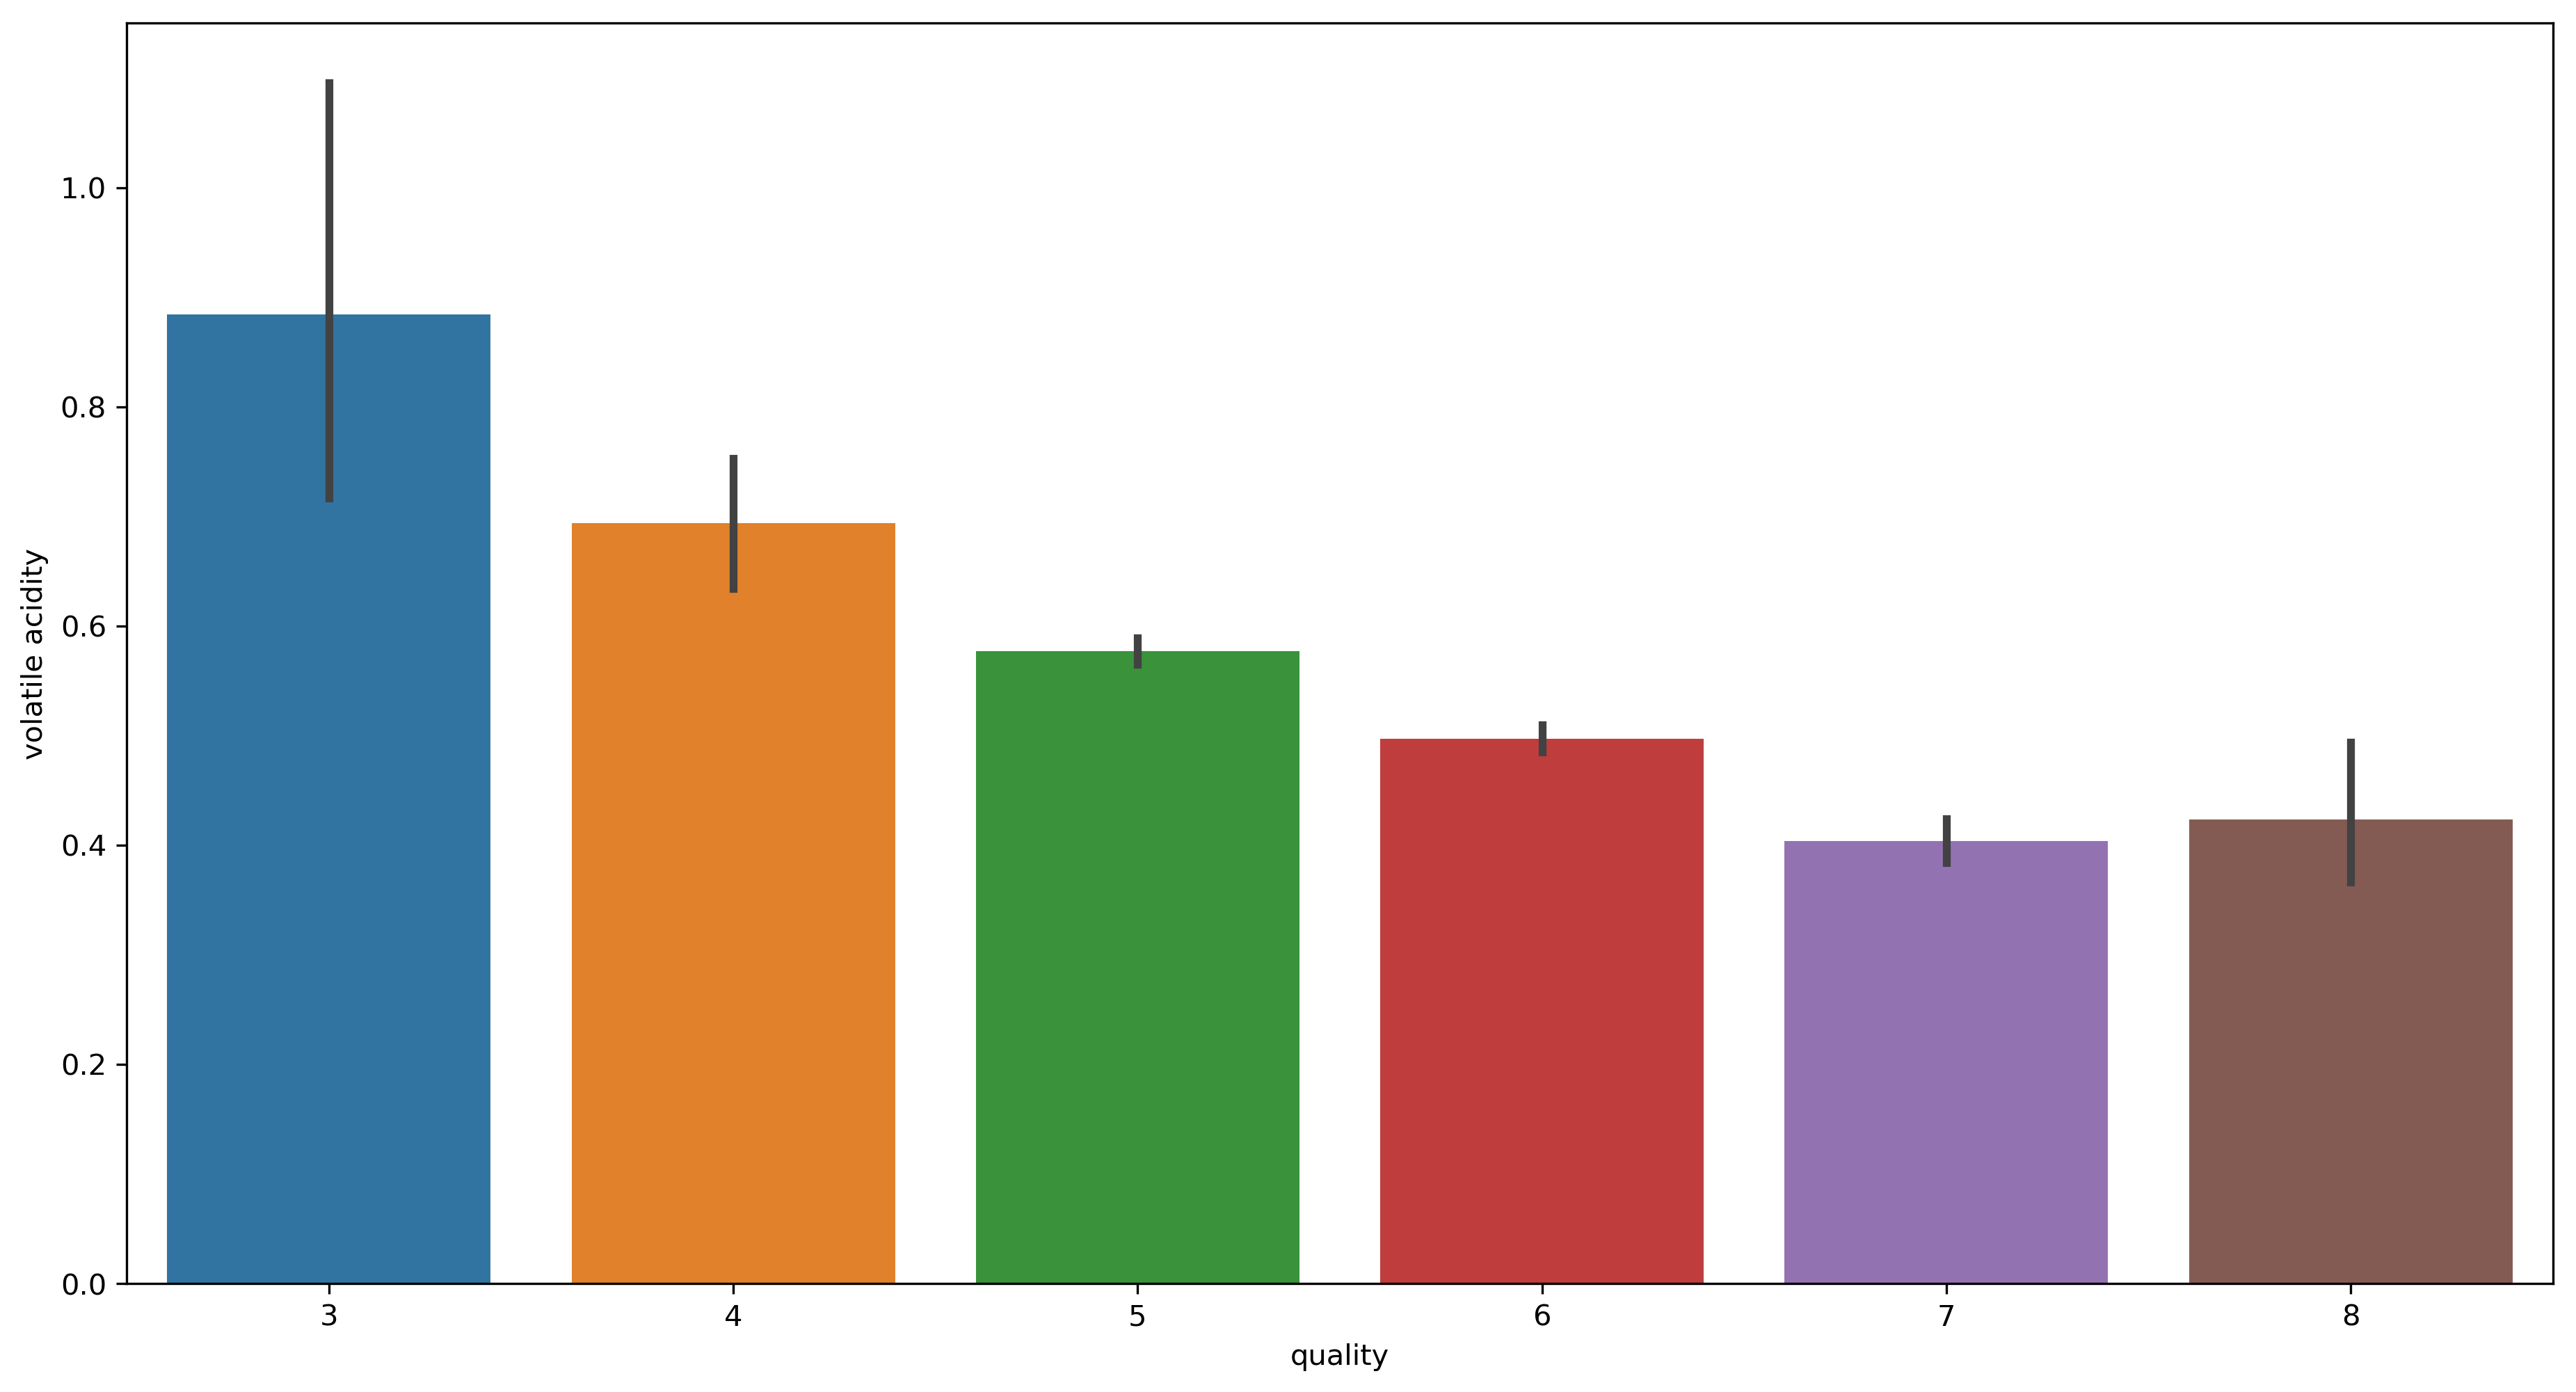

In [16]:
plt.figure(figsize=(15,8),dpi=300)
sns.barplot(x=df['quality'],y=df['volatile acidity'],data=df)

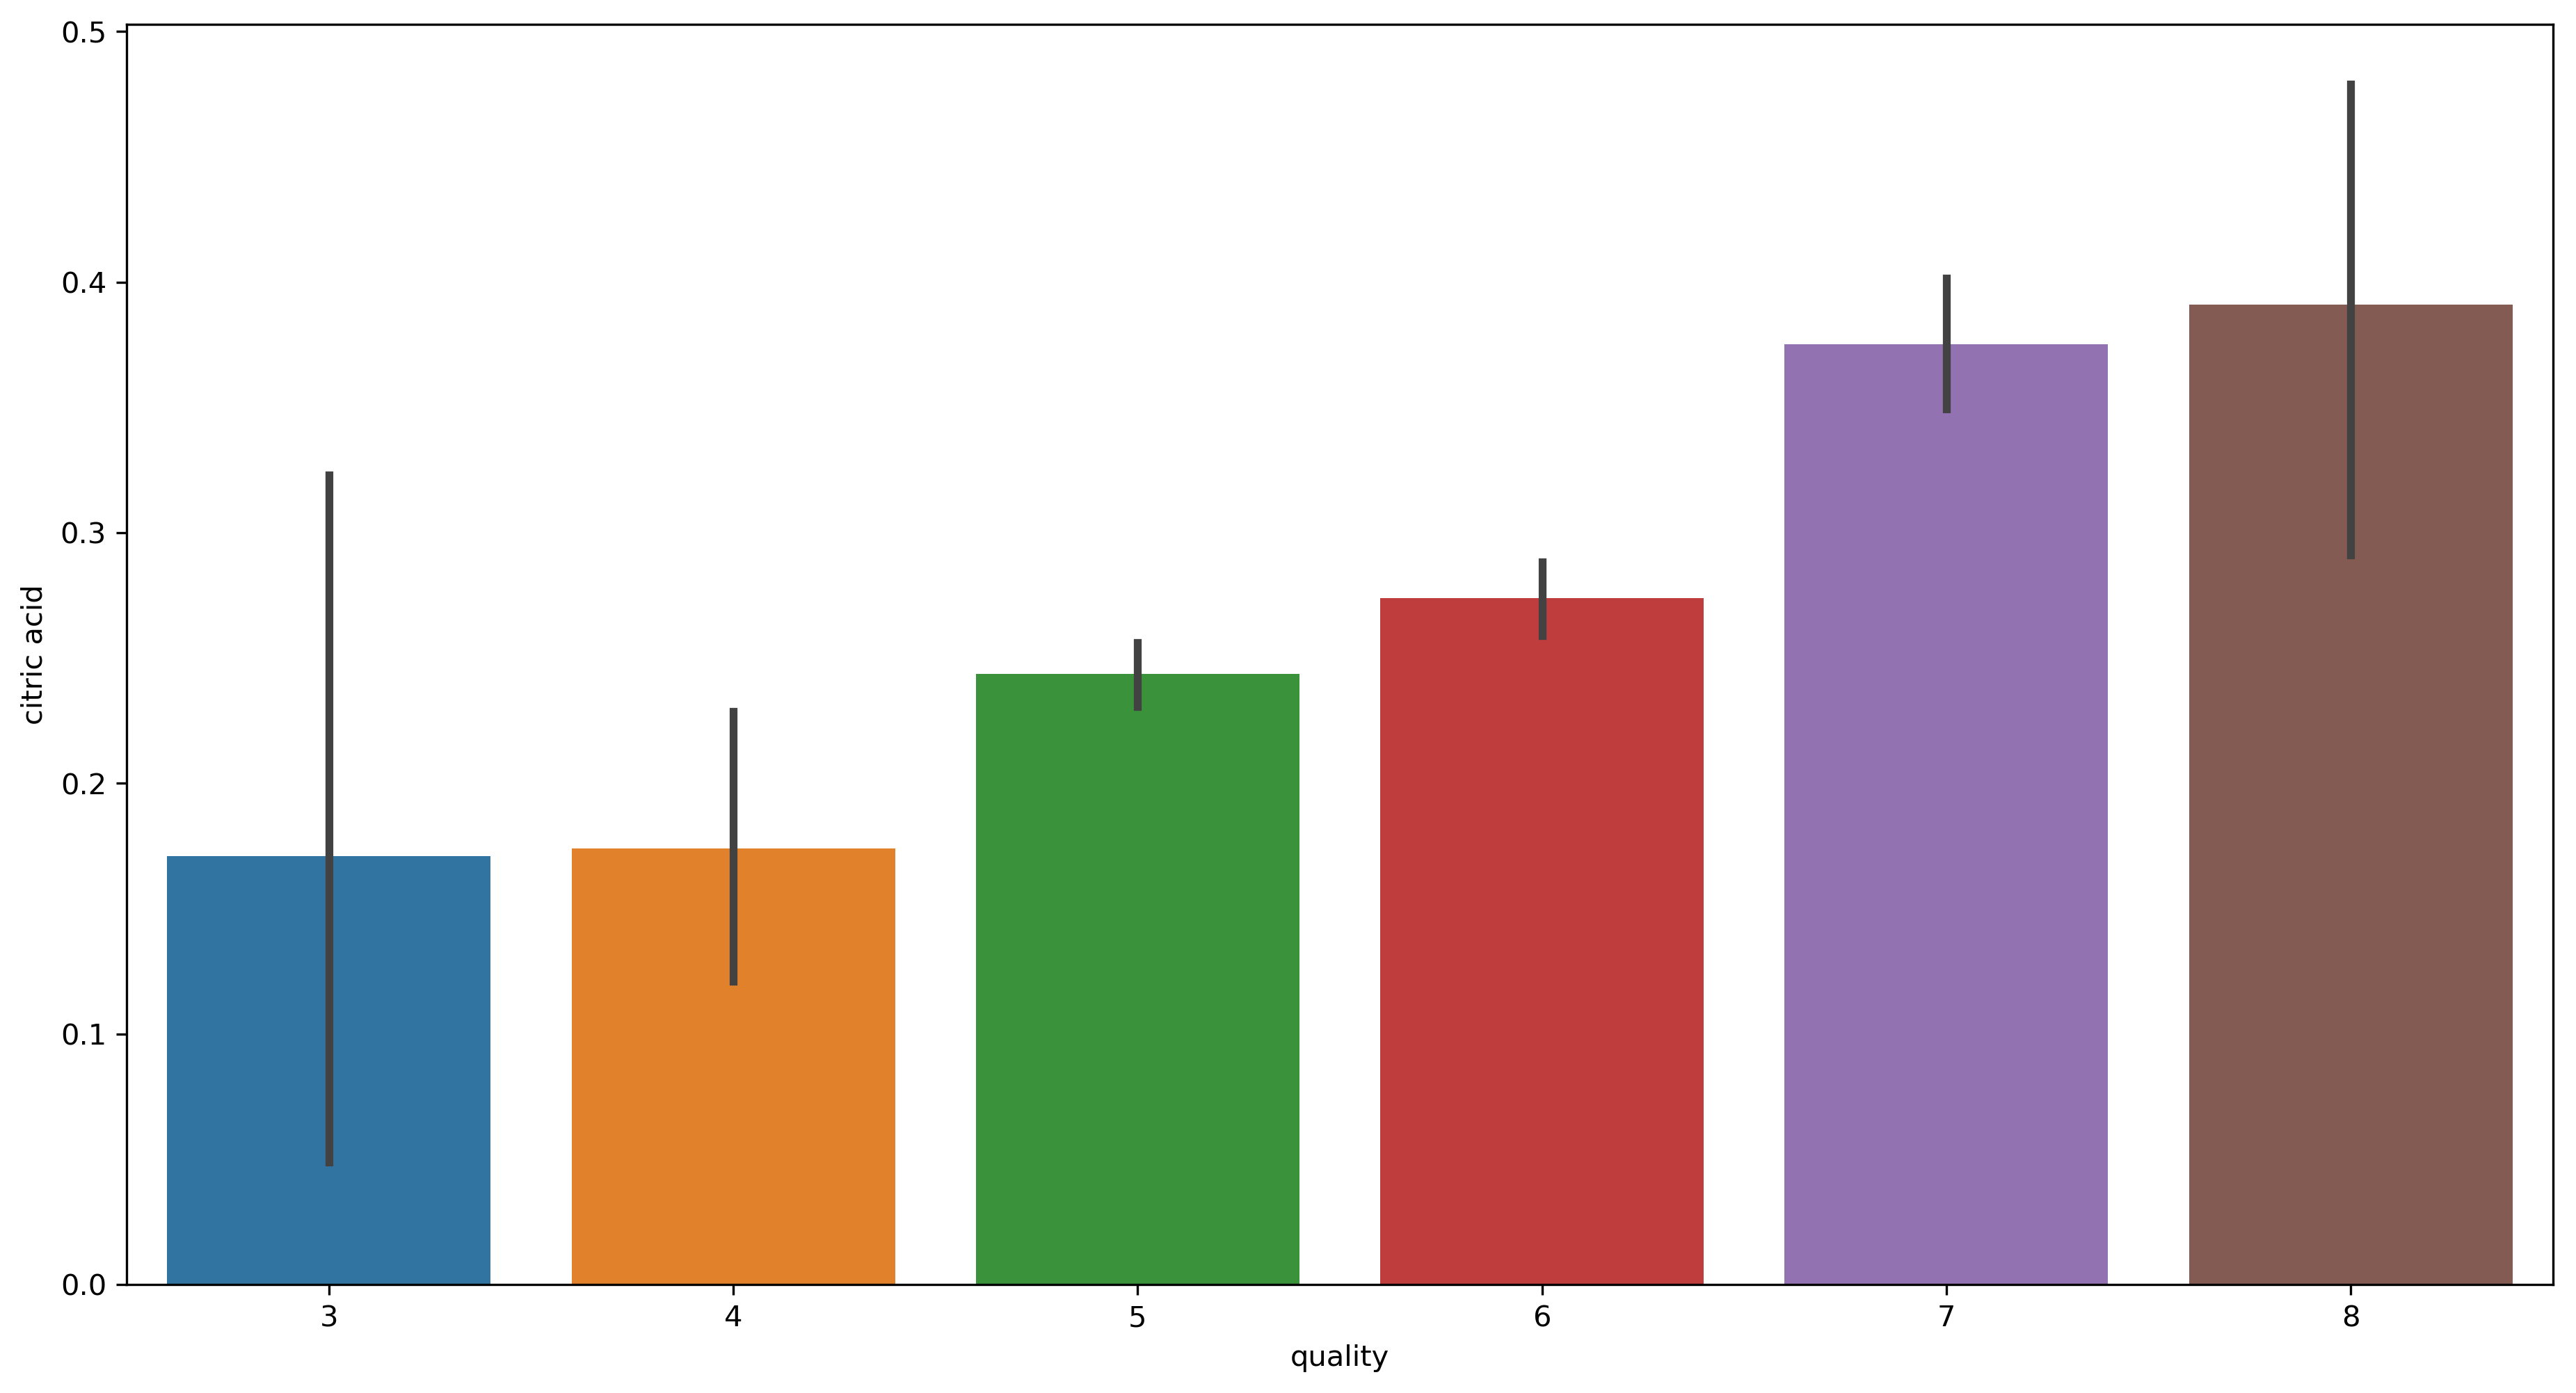

In [27]:
plt.figure(figsize=(15,8),dpi=300)
sns.barplot(x=df['quality'],y=df['citric acid'])

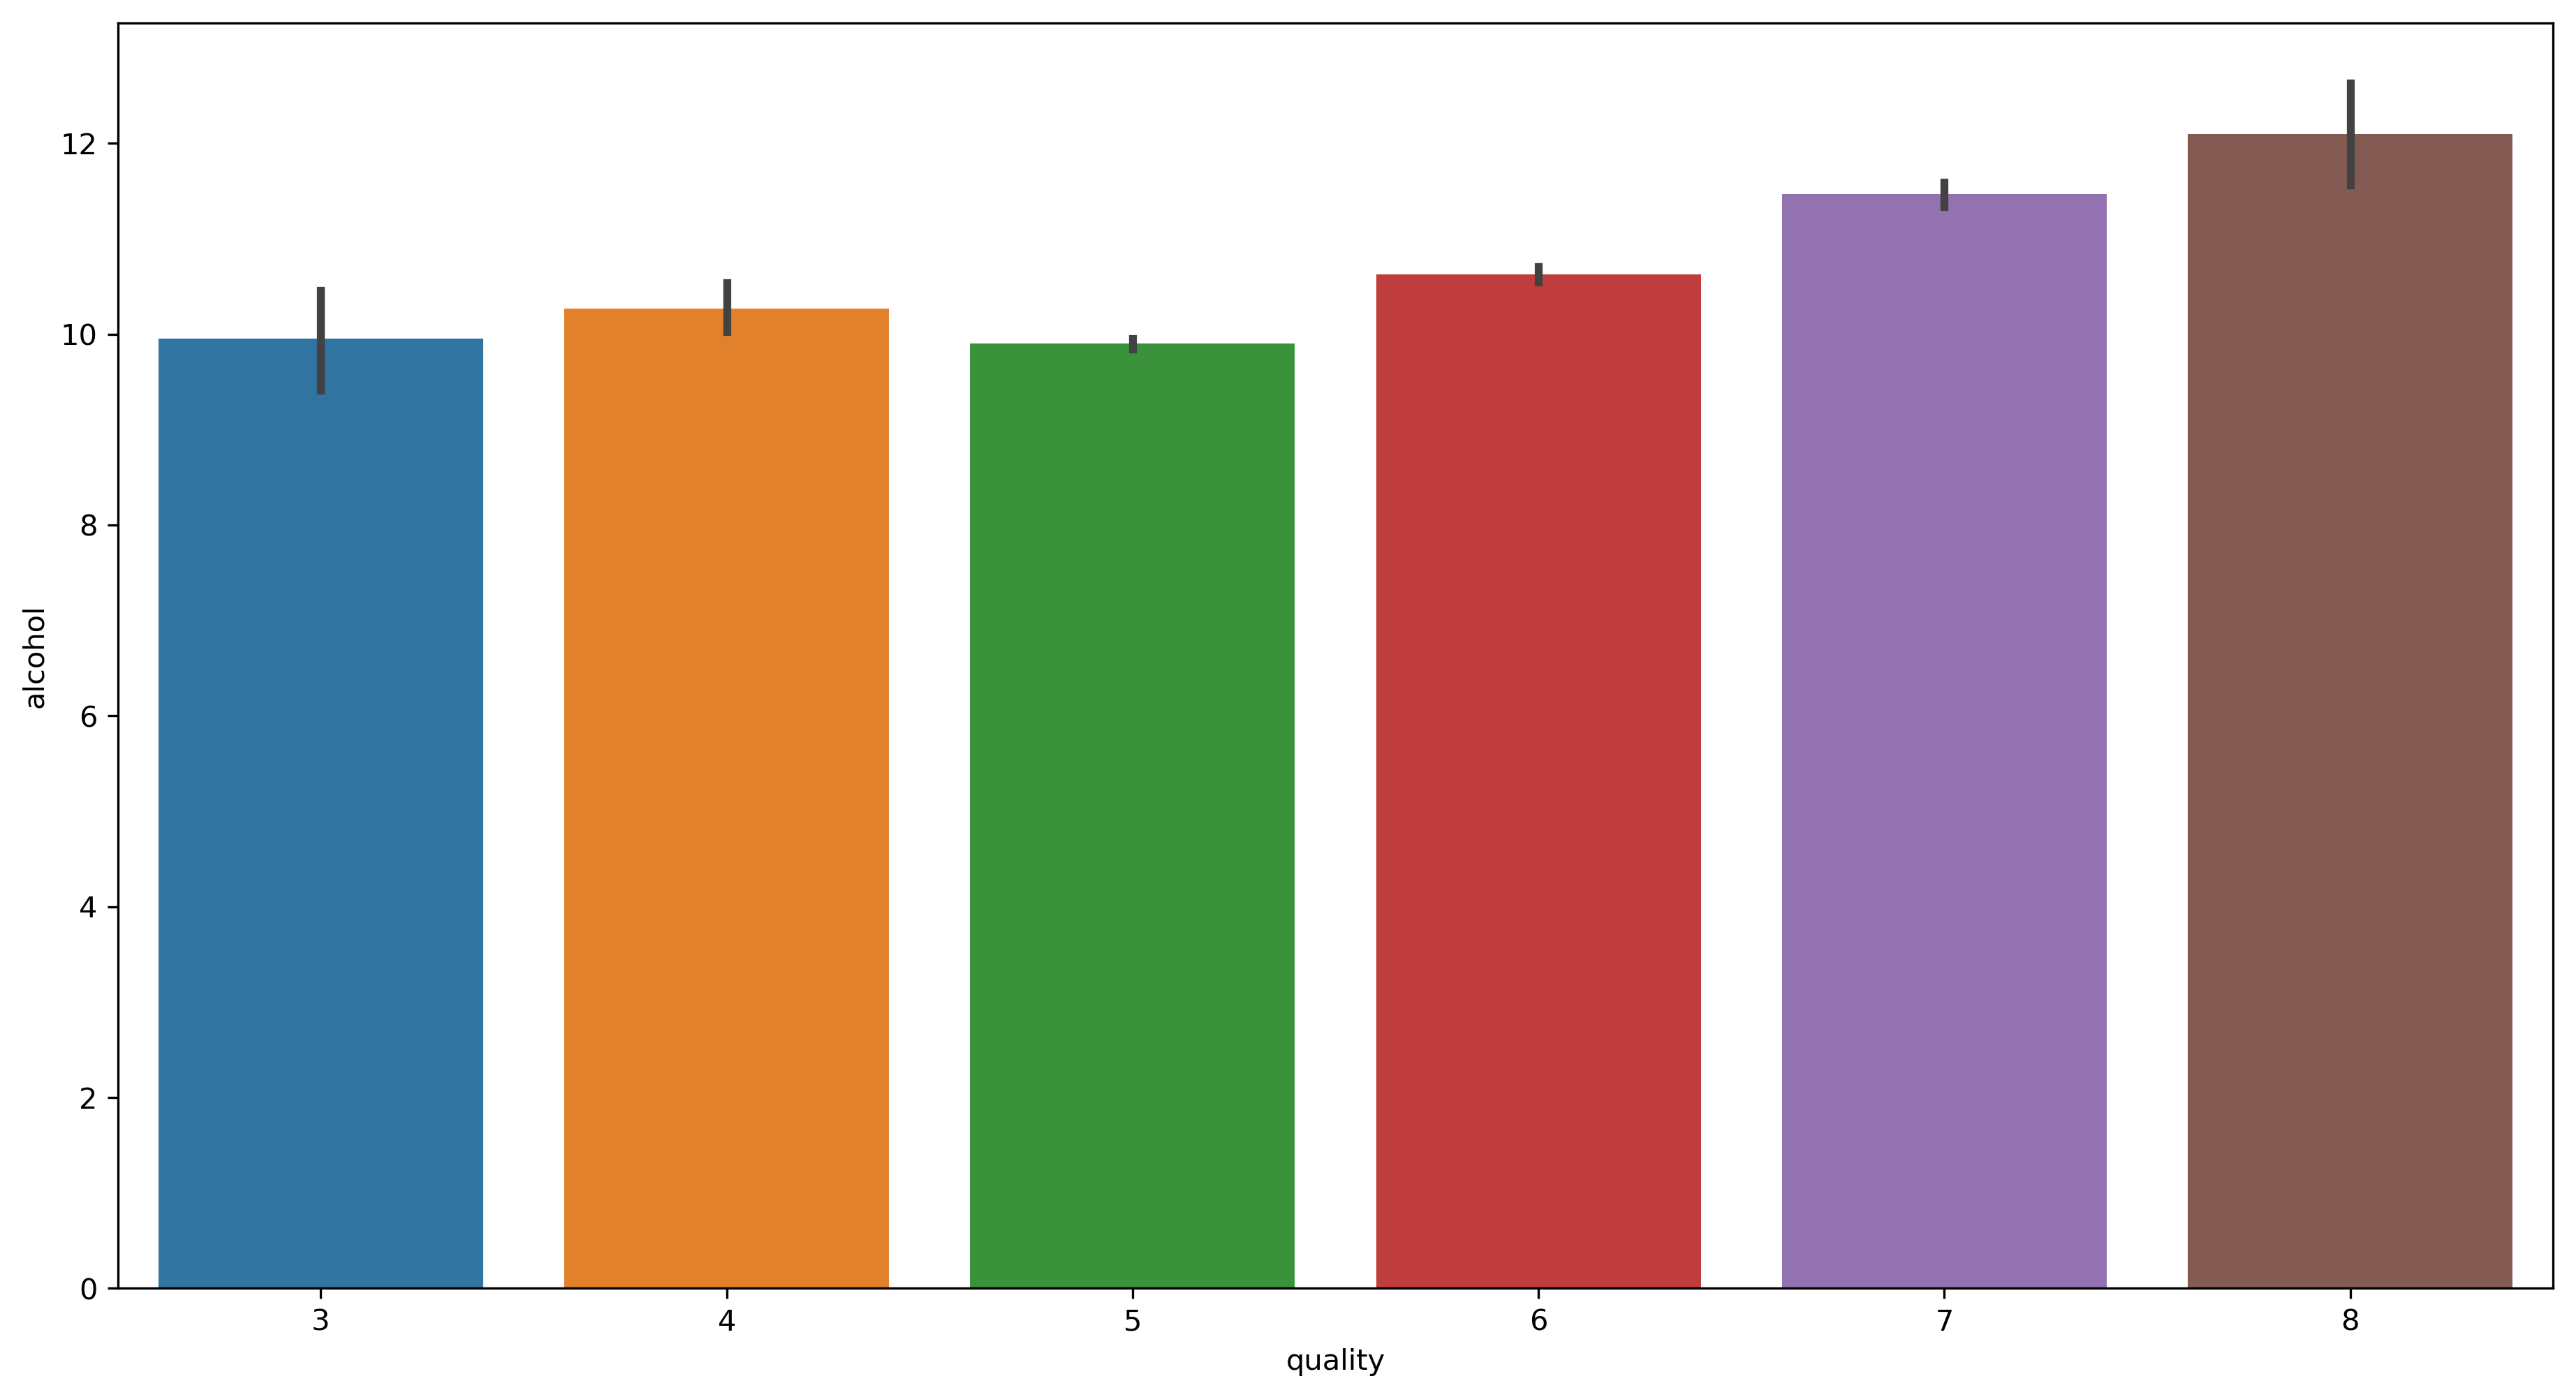

In [24]:
plt.figure(figsize=(15,8),dpi=300)
sns.barplot(x='quality',y='alcohol',data=df)

In [29]:
x=df.drop(['quality'],axis=1)
y=df['quality']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
model=RandomForestClassifier(n_estimators=200).fit(x_train,y_train)

In [43]:
pred=model.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix,classification_report

In [54]:
print(confusion_matrix(y_test,pred))

[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 97 32  1  0]
 [ 0  0 35 91  6  0]
 [ 0  0  0 21 20  1]
 [ 0  0  0  0  5  0]]


In [56]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        10
          5       0.69      0.75      0.72       130
          6       0.62      0.69      0.65       132
          7       0.62      0.48      0.54        42
          8       0.00      0.00      0.00         5

avg / total       0.62      0.65      0.63       320



C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
#Making Binary Classification for the Response Variable/Dependent Variable/Label/for y
#Dividing wine as Good and Bad by giving the limit for the quality
bins=(2,6.5,8)
group_names=['bad','good']
df['quality']=pd.cut(df['quality'],bins=bins,labels=group_names)

In [58]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
df['quality']=LabelEncoder().fit_transform(df['quality'])

In [61]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


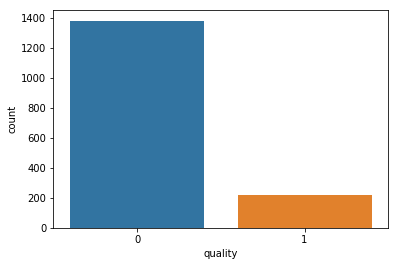

In [64]:
sns.countplot(df['quality'])

In [78]:
x=df.drop(['quality'],axis=1)
y=df['quality']

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [91]:
#Feature Scaling for to get the Optimized Results and for ease the calculations
from sklearn.preprocessing import StandardScaler

In [92]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [93]:
#Now Our data is Ready for Applying Machine Learning Algorithm

In [94]:
#Random Forest 

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
model=RandomForestClassifier(n_estimators=200).fit(x_train,y_train)

In [107]:
pred=model.predict(x_test)

In [108]:
from sklearn.metrics import confusion_matrix,classification_report

In [109]:
print(confusion_matrix(y_test,pred))

[[267   6]
 [ 23  24]]


In [110]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.92      0.98      0.95       273
          1       0.80      0.51      0.62        47

avg / total       0.90      0.91      0.90       320



In [111]:
#Applying SVC

In [114]:
from sklearn.svm import SVC

In [115]:
model=SVC().fit(x_train,y_train)

In [116]:
pred=model.predict(x_test)

In [117]:
print(confusion_matrix(y_test,pred))

[[268   5]
 [ 35  12]]


In [118]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       273
          1       0.71      0.26      0.37        47

avg / total       0.86      0.88      0.85       320



In [119]:
#Lets try to improve the Perfomance or accuracy of models by using GridSearchCV

In [120]:
pd={'C':[0.1,0.5,0.8,0.9,1.0,1.1,1.2,1.4,1.5,2],'kernel':['linear','rbf'],'gamma':[1,10,100,1000,10000]}

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
grid=GridSearchCV(estimator=SVC(),param_grid=pd,refit=True,verbose=3)

In [124]:
grid.best_params_

{'C': 1.2, 'gamma': 1, 'kernel': 'rbf'}

In [125]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.8665105386416861, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.8665105386416861, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.8682352941176471, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8665105386416861, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8665105386416861, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8682352941176471, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV]  C=0.1, gamma=10, kernel=linear, score=0.8665105386416861, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV]  C=0.1, gamma=10, kernel=linear, score=0.8665105386416861, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV]  C=0.1, gamma=10, kernel=linear, score=0.8682352941176471, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV]  C=0.1, gamma=10, kernel=rbf, score=0.8665105386416861, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV]  C=0.1, gamma=10, kernel=rbf, score=0.8665105386416861, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .........

[CV]  C=0.8, gamma=1, kernel=rbf, score=0.8758782201405152, total=   0.0s
[CV] C=0.8, gamma=1, kernel=rbf ......................................
[CV]  C=0.8, gamma=1, kernel=rbf, score=0.8894117647058823, total=   0.0s
[CV] C=0.8, gamma=10, kernel=linear ..................................
[CV]  C=0.8, gamma=10, kernel=linear, score=0.8665105386416861, total=   0.0s
[CV] C=0.8, gamma=10, kernel=linear ..................................
[CV]  C=0.8, gamma=10, kernel=linear, score=0.8665105386416861, total=   0.0s
[CV] C=0.8, gamma=10, kernel=linear ..................................
[CV]  C=0.8, gamma=10, kernel=linear, score=0.8682352941176471, total=   0.0s
[CV] C=0.8, gamma=10, kernel=rbf .....................................
[CV]  C=0.8, gamma=10, kernel=rbf, score=0.8688524590163934, total=   0.0s
[CV] C=0.8, gamma=10, kernel=rbf .....................................
[CV]  C=0.8, gamma=10, kernel=rbf, score=0.8688524590163934, total=   0.0s
[CV] C=0.8, gamma=10, kernel=rbf .........

[CV]  C=1.0, gamma=1, kernel=rbf, score=0.892271662763466, total=   0.0s
[CV] C=1.0, gamma=1, kernel=rbf ......................................
[CV]  C=1.0, gamma=1, kernel=rbf, score=0.9058823529411765, total=   0.0s
[CV] C=1.0, gamma=10, kernel=linear ..................................
[CV]  C=1.0, gamma=10, kernel=linear, score=0.8665105386416861, total=   0.0s
[CV] C=1.0, gamma=10, kernel=linear ..................................
[CV]  C=1.0, gamma=10, kernel=linear, score=0.8665105386416861, total=   0.0s
[CV] C=1.0, gamma=10, kernel=linear ..................................
[CV]  C=1.0, gamma=10, kernel=linear, score=0.8682352941176471, total=   0.0s
[CV] C=1.0, gamma=10, kernel=rbf .....................................
[CV]  C=1.0, gamma=10, kernel=rbf, score=0.8946135831381733, total=   0.0s
[CV] C=1.0, gamma=10, kernel=rbf .....................................
[CV]  C=1.0, gamma=10, kernel=rbf, score=0.8899297423887588, total=   0.0s
[CV] C=1.0, gamma=10, kernel=rbf ..........

[CV]  C=1.2, gamma=1, kernel=rbf, score=0.892271662763466, total=   0.0s
[CV] C=1.2, gamma=1, kernel=rbf ......................................
[CV]  C=1.2, gamma=1, kernel=rbf, score=0.9129411764705883, total=   0.0s
[CV] C=1.2, gamma=10, kernel=linear ..................................
[CV]  C=1.2, gamma=10, kernel=linear, score=0.8665105386416861, total=   0.0s
[CV] C=1.2, gamma=10, kernel=linear ..................................
[CV]  C=1.2, gamma=10, kernel=linear, score=0.8665105386416861, total=   0.0s
[CV] C=1.2, gamma=10, kernel=linear ..................................
[CV]  C=1.2, gamma=10, kernel=linear, score=0.8682352941176471, total=   0.0s
[CV] C=1.2, gamma=10, kernel=rbf .....................................
[CV]  C=1.2, gamma=10, kernel=rbf, score=0.8946135831381733, total=   0.0s
[CV] C=1.2, gamma=10, kernel=rbf .....................................
[CV]  C=1.2, gamma=10, kernel=rbf, score=0.8899297423887588, total=   0.0s
[CV] C=1.2, gamma=10, kernel=rbf ..........

[CV]  C=1.5, gamma=1, kernel=rbf, score=0.9016393442622951, total=   0.0s
[CV] C=1.5, gamma=1, kernel=rbf ......................................
[CV]  C=1.5, gamma=1, kernel=rbf, score=0.8946135831381733, total=   0.0s
[CV] C=1.5, gamma=1, kernel=rbf ......................................
[CV]  C=1.5, gamma=1, kernel=rbf, score=0.9129411764705883, total=   0.0s
[CV] C=1.5, gamma=10, kernel=linear ..................................
[CV]  C=1.5, gamma=10, kernel=linear, score=0.8665105386416861, total=   0.0s
[CV] C=1.5, gamma=10, kernel=linear ..................................
[CV]  C=1.5, gamma=10, kernel=linear, score=0.8665105386416861, total=   0.0s
[CV] C=1.5, gamma=10, kernel=linear ..................................
[CV]  C=1.5, gamma=10, kernel=linear, score=0.8682352941176471, total=   0.0s
[CV] C=1.5, gamma=10, kernel=rbf .....................................
[CV]  C=1.5, gamma=10, kernel=rbf, score=0.8946135831381733, total=   0.0s
[CV] C=1.5, gamma=10, kernel=rbf ..........

[CV]  C=2, gamma=10000, kernel=rbf, score=0.8964705882352941, total=   0.1s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   31.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.5, 0.8, 0.9, 1.0, 1.1, 1.2, 1.4, 1.5, 2], 'kernel': ['linear', 'rbf'], 'gamma': [1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [126]:
grid.best_params_

{'C': 1.2, 'gamma': 1, 'kernel': 'rbf'}

In [127]:
pred=grid.predict(x_test)

In [128]:
print(confusion_matrix(y_test,pred))

[[271   2]
 [ 30  17]]


In [129]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.90      0.99      0.94       273
          1       0.89      0.36      0.52        47

avg / total       0.90      0.90      0.88       320



In [130]:
#Cross Validation Score for Random Forest Classifier

In [131]:
from sklearn.model_selection import cross_val_score

In [133]:
accuracies=cross_val_score(estimator=RandomForestClassifier(n_estimators=200),X=x_train,y=y_train,cv=10)

In [134]:
accuracies.mean()

0.9140194389763779

In [135]:
accuracies.std()

0.0276833585939174